In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime
from sklearn import metrics

#### UDF's

In [2]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [3]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [4]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    return x

In [5]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

### data import and inspection

In [6]:
Attack_Back=pd.read_csv('C:/Users/avnis/Case study/Machine Learning/CS 12/Data_of_Attack_Back.csv')
Attack_Back_BackButterOverflow=pd.read_csv('C:/Users/avnis/Case study/Machine Learning/CS 12/Data_of_Attack_Back_BufferOverflow.csv')
Attack_Back_FTPWrite=pd.read_csv('C:/Users/avnis/Case study/Machine Learning/CS 12/Data_of_Attack_Back_FTPWrite.csv')
Attack_Back_GuessPassword=pd.read_csv('C:/Users/avnis/Case study/Machine Learning/CS 12/Data_of_Attack_Back_GuessPassword.csv')
Attack_Back_Neptune=pd.read_csv('C:/Users/avnis/Case study/Machine Learning/CS 12/Data_of_Attack_Back_Neptune.csv')
Attack_Back_NMap=pd.read_csv('C:/Users/avnis/Case study/Machine Learning/CS 12/Data_of_Attack_Back_NMap.csv')
Attack_Back_Normal=pd.read_csv('C:/Users/avnis/Case study/Machine Learning/CS 12/Data_of_Attack_Back_Normal.csv')
Attack_Back_PortSweep=pd.read_csv('C:/Users/avnis/Case study/Machine Learning/CS 12/Data_of_Attack_Back_PortSweep.csv')
Attack_Back_RootKit=pd.read_csv('C:/Users/avnis/Case study/Machine Learning/CS 12/Data_of_Attack_Back_RootKit.csv')
Attack_Back_Satan=pd.read_csv('C:/Users/avnis/Case study/Machine Learning/CS 12/Data_of_Attack_Back_Satan.csv')
Attack_Back_Smurf=pd.read_csv('C:/Users/avnis/Case study/Machine Learning/CS 12/Data_of_Attack_Back_Smurf.csv')

In [7]:
Attack_Back['ATTACK']='Attack'
Attack_Back_BackButterOverflow['ATTACK']='Attack'
Attack_Back_FTPWrite['ATTACK']='Attack'
Attack_Back_GuessPassword['ATTACK']='Attack'
Attack_Back_Neptune['ATTACK']='Attack'
Attack_Back_NMap['ATTACK']='Attack'
Attack_Back_PortSweep['ATTACK']='Attack'
Attack_Back_RootKit['ATTACK']='Attack'
Attack_Back_Satan['ATTACK']='Attack'
Attack_Back_Smurf['ATTACK']='Attack'
Attack_Back_Normal['ATTACK']='Normal'

In [8]:
Attack_Back.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,ATTACK
0,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.001,0.1,0,0.10,0,0.0,0.0,0.0,0.0,Attack
1,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.002,0.1,0,0.05,0,0.0,0.0,0.0,0.0,Attack


In [9]:
Data=pd.concat([Attack_Back,Attack_Back_BackButterOverflow,Attack_Back_FTPWrite,
               Attack_Back_GuessPassword,Attack_Back_Neptune,Attack_Back_NMap,
               Attack_Back_Normal,Attack_Back_PortSweep,Attack_Back_RootKit,
               Attack_Back_Satan,Attack_Back_Smurf],axis=0,ignore_index=True)

In [10]:
Data.drop(['0.0026', ' 0', ' 0.07', ' 0.1',
       ' 0.00116',' 0.00451', ' 0.2', ' 0.3', ' 0.4', ' 0.2.1', ' 0.5',
       ' 0.1.1', ' 0.6', ' 0.7', ' 0.8', ' 0.9', ' 0.1.2', ' 0.10', ' 0.1.3',
       ' 0.11', ' 0.12', ' 0.1.4', ' 0.001', ' 0.001.1', ' 0.13', ' 0.14',
       ' 0.15', ' 0.16', ' 0.1.5', ' 0.17', ' 0.18', ' 0.001.2', ' 0.001.3',
       ' 0.1.6', ' 0.19', ' 0.1.7', ' 0.20', ' 0.21', ' 0.22', ' 0.23',
       ' 0.24'],axis=1,inplace=True)

In [11]:
Data.shape

(817550, 42)

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817550 entries, 0 to 817549
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      817543 non-null  float64
 1    protocol_type                817543 non-null  float64
 2    service                      817543 non-null  float64
 3    flag                         817543 non-null  float64
 4    src_bytes                    817543 non-null  float64
 5    dst_bytes                    817543 non-null  float64
 6    land                         817543 non-null  float64
 7    wrong_fragment               817543 non-null  float64
 8    urgent                       817543 non-null  float64
 9    hot                          817543 non-null  float64
 10   num_failed_logins            817543 non-null  float64
 11   logged_in                    817543 non-null  float64
 12   num_compromised              817543 non-nul

In [13]:
Data.nunique()

duration                          918
 protocol_type                      3
 service                           67
 flag                              11
 src_bytes                       5908
 dst_bytes                      18398
 land                               1
 wrong_fragment                     2
 urgent                             5
 hot                               11
 num_failed_logins                  6
 logged_in                          2
 num_compromised                   11
 root_shell                         2
 su_attempted                       3
 num_root                          11
 num_file_creations                11
 num_shells                         3
 num_access_files                   9
 num_outbound_cmds                  1
 is_host_login                      2
 is_guest_login                     2
 count                            512
 srv_count                        512
 serror_rate                       96
 srv_error_rate                    75
 rerror_rate

### EXPLORATORY ANALYSIS

In [14]:
# summaries of continuous variables
Data.select_dtypes(['float64']).apply(continuous_var_summary)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
N,817543.000000,817543.000000,817543.000000,817543.000000,817543.000000,817543.000000,817543.0,8.175430e+05,8.175430e+05,817543.000000,...,817543.000000,817543.000000,817543.000000,817543.000000,817543.000000,817543.000000,817543.000000,817543.000000,817543.000000,817543.000000
NMISS,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000e+00,7.000000e+00,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
SUM,716.808800,465.680000,43254.220000,16481.500000,4056.166760,20325.602660,0.0,3.000000e-01,1.800000e+00,2007.300000,...,136423.290000,132158.013000,54607.321000,2763.120000,5025.482000,1375.513000,20328.601000,20317.676000,4392.049000,4315.787000
MEAN,0.000877,0.000570,0.052908,0.020160,0.004961,0.024862,0.0,3.669532e-07,2.201719e-06,0.002455,...,0.166870,0.161653,0.066794,0.003380,0.006147,0.001682,0.024865,0.024852,0.005372,0.005279
MEDIAN,0.000000,0.000000,0.000000,0.000000,0.002170,0.003670,0.0,0.000000e+00,0.000000e+00,0.000000,...,0.255000,0.255000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
STD,0.026636,0.002596,0.096388,0.030960,0.033235,0.066634,0.0,3.317920e-04,7.662382e-04,0.041469,...,0.102057,0.111642,0.043421,0.008556,0.017458,0.003708,0.043062,0.043152,0.021920,0.022070
VAR,0.000709,0.000007,0.009291,0.000958,0.001105,0.004440,0.0,1.100860e-07,5.871210e-07,0.001720,...,0.010416,0.012464,0.001885,0.000073,0.000305,0.000014,0.001854,0.001862,0.000480,0.000487
MIN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,...,0.001000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,...,0.006000,0.003000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
Data.ATTACK.value_counts()/Data.shape[0]

Normal    0.705413
Attack    0.294587
Name: ATTACK, dtype: float64

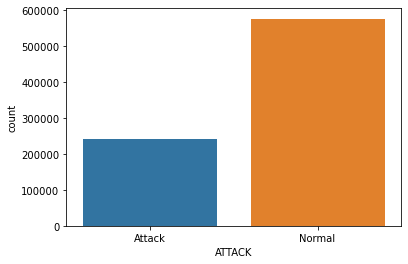

In [16]:
sns.countplot(x=Data.ATTACK)
plt.show()

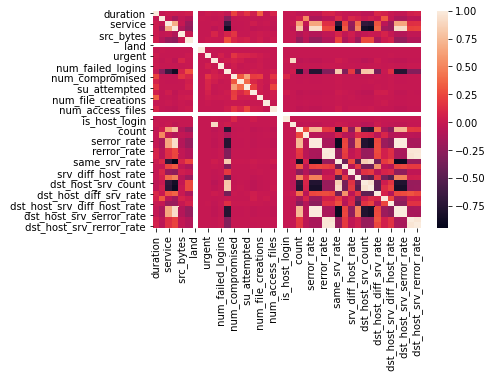

In [17]:
# Check the corr between the variables
sns.heatmap(Data.corr())
plt.show()

### Feature Selection

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [18]:
# get the y and X varaibales
y_var='ATTACK'
x_var=Data.columns.difference(['ATTACK'])

In [19]:
Data[x_var]=Data[x_var].apply(lambda x:missing_imputation(x))

In [20]:
#running logistic regression model
logreg=LogisticRegression(max_iter=1000)

In [21]:
# RFE for feature selection
rfe=RFE(logreg,n_features_to_select=20).fit(Data[x_var],Data[y_var])

In [22]:
rfe.support_

array([ True, False, False,  True,  True, False,  True, False,  True,
        True, False,  True,  True,  True, False, False, False, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False, False,  True,  True, False,  True, False,  True,  True,
        True, False, False, False, False])

In [23]:
RFE_Output = pd.DataFrame([x_var, rfe.support_, rfe.ranking_]).T
RFE_Output.columns = ['Features', 'support', 'ranking']

In [25]:
RFE_Output.sort_values(by='ranking')

,Features,support,ranking
0,count,True,1
36,srv_rerror_rate,True,1
35,srv_error_rate,True,1
34,srv_diff_host_rate,True,1
32,src_bytes,True,1
30,serror_rate,True,1
29,same_srv_rate,True,1
26,protocol_type,True,1
24,num_root,True,1
22,num_file_creations,True,1


In [24]:
X_final=Data[x_var[rfe.support_]]
Y_final=Data['ATTACK']

### Build the model

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [26]:
# data set partition
X_train,X_test,Y_train,Y_test=train_test_split(X_final,Y_final,
                                               train_size=0.7,
                                              random_state=1234)

#### Trying the Decison Tree Model

In [34]:
### set the tuning parameters
tune_param={'max_depth':range(10,15)
           }

#build the model
tree1=GridSearchCV(DecisionTreeClassifier(random_state=1),
                       tune_param,
                       verbose=True,
                       cv=5,
                       scoring='roc_auc',
                  n_jobs=-1).fit(X_train,Y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [35]:
tree1.best_params_

{'max_depth': 13, 'min_samples_leaf': 9}

In [39]:
metrics.roc_auc_score(Y_train,tree1.predict_proba(X_train)[:, 1])

0.9999949549788043

In [ ]:
#building the model with best param
tree2=DecisionTreeClassifier(random_state=12,max_depth=13).fit(X_train,Y_train)

### Evaluate the decision Tree model

In [65]:
# get the model accuracy
print(metrics.accuracy_score(Y_train, tree2.predict(X_train)))

0.9998811780843461


In [66]:
# get the probability score on training
train_predict_prob = pd.DataFrame(tree2.predict_proba(X_train))[1]

In [67]:
# get the model auc
print(metrics.roc_auc_score(Y_train, train_predict_prob))

0.9999814407015515


Text(0.5, 15.0, 'Predicted label')

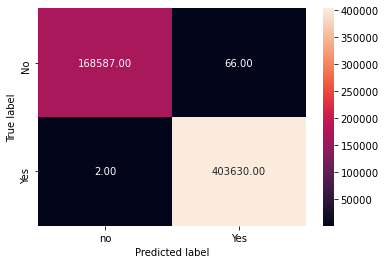

In [68]:
#getting the confusion matrix
dc_cm=metrics.confusion_matrix(Y_train, tree2.predict(X_train))
sns.heatmap(dc_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [69]:
# Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(Y_train, tree2.predict( X_train )))

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00    168653
      Normal       1.00      1.00      1.00    403632

    accuracy                           1.00    572285
   macro avg       1.00      1.00      1.00    572285
weighted avg       1.00      1.00      1.00    572285



### Validate the model on Test Data

In [70]:
# get the model accuracy
print(metrics.accuracy_score(Y_test, tree2.predict(X_test)))

0.9997023627504944


In [71]:
# get the probability score on testing
test_predict_prob = pd.DataFrame(tree2.predict_proba(X_test))[1]

In [73]:
# get the model auc
print(metrics.roc_auc_score(Y_test, test_predict_prob))

0.999707279663026


Text(0.5, 15.0, 'Predicted label')

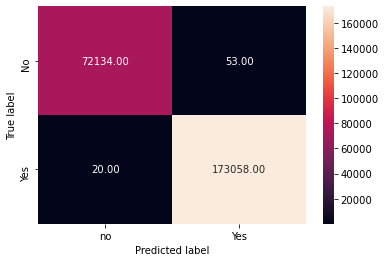

In [74]:
#getting the confusion matrix
dc_cm=metrics.confusion_matrix(Y_test, tree2.predict(X_test))
sns.heatmap(dc_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [81]:
# Compute precision, recall, F-measure and support
print(classification_report(Y_test, tree2.predict( X_test )))

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00     72187
      Normal       1.00      1.00      1.00    173078

    accuracy                           1.00    245265
   macro avg       1.00      1.00      1.00    245265
weighted avg       1.00      1.00      1.00    245265



## Using the Naive Bayse model

In [76]:
from sklearn.naive_bayes import BernoulliNB

In [77]:
model_NB=BernoulliNB().fit(X_train,Y_train)

#### Evaluate Naive bayse model

In [80]:
#Accuracy score
accuracy=metrics.accuracy_score( Y_train, model_NB.predict( X_train ) )
print("GaussianNB model accuracy on train data: %.3f" % (accuracy))

GaussianNB model accuracy on train data: 0.990


Text(0.5, 15.0, 'Predicted label')

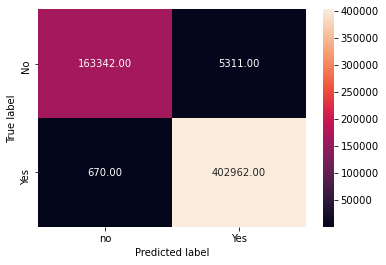

In [78]:
#Confusion Matrix
nb_cm=metrics.confusion_matrix( Y_train,model_NB.predict(X_train) )
sns.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [82]:
# Compute precision, recall, F-measure and support
print(classification_report(Y_train, model_NB.predict( X_train )))

              precision    recall  f1-score   support

      Attack       1.00      0.97      0.98    168653
      Normal       0.99      1.00      0.99    403632

    accuracy                           0.99    572285
   macro avg       0.99      0.98      0.99    572285
weighted avg       0.99      0.99      0.99    572285



### Validate the model

In [83]:
#Accuracy score
accuracy=metrics.accuracy_score( Y_test, model_NB.predict( X_test ) )
print("GaussianNB model accuracy on test data: %.3f" % (accuracy))

GaussianNB model accuracy on test data: 0.990


Text(0.5, 15.0, 'Predicted label')

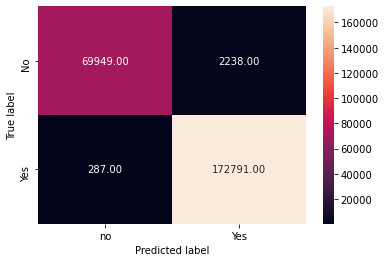

In [84]:
#Confusion Matrix
nb_cm=metrics.confusion_matrix( Y_test,model_NB.predict(X_test) )
sns.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [63]:
# Compute precision, recall, F-measure and support
print(classification_report(Y_test, model_NB.predict( X_test )))

              precision    recall  f1-score   support

      Attack       1.00      0.97      0.98     72187
      Normal       0.99      1.00      0.99    173078

    accuracy                           0.99    245265
   macro avg       0.99      0.98      0.99    245265
weighted avg       0.99      0.99      0.99    245265

